In [2]:
%run 0.0_Dependance.ipynb

In [44]:
df = pd.read_csv("train.csv",index_col=0)
df.Age = np.round((df.Age)/365,1)

In [45]:
for i in df.columns:
    if df[i].dtypes != "object":
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df["extreme_" + i] = df[i].apply(lambda x: 1 if (x < lower_bound or x > upper_bound) else 0)


In [48]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
print(Q3,IQR)

56.7 14.0


In [57]:
for i in df.columns:
    if "extreme_" in i:
        print(i)
        print(df.loc[df[i]==1].Status.value_counts(normalize = True))

extreme_N_Days
Series([], Name: proportion, dtype: float64)
extreme_Age
Status
C    0.75
D    0.25
Name: proportion, dtype: float64
extreme_Bilirubin
Status
D     0.804816
C     0.173638
CL    0.021546
Name: proportion, dtype: float64
extreme_Cholesterol
Status
D     0.625498
C     0.336653
CL    0.037849
Name: proportion, dtype: float64
extreme_Albumin
Status
D     0.786517
C     0.207865
CL    0.005618
Name: proportion, dtype: float64
extreme_Copper
Status
D     0.772519
C     0.201527
CL    0.025954
Name: proportion, dtype: float64
extreme_Alk_Phos
Status
D     0.516414
C     0.452020
CL    0.031566
Name: proportion, dtype: float64
extreme_SGOT
Status
D     0.575342
C     0.397260
CL    0.027397
Name: proportion, dtype: float64
extreme_Tryglicerides
Status
D     0.617978
C     0.337079
CL    0.044944
Name: proportion, dtype: float64
extreme_Platelets
Status
C     0.587719
D     0.394737
CL    0.017544
Name: proportion, dtype: float64
extreme_Prothrombin
Status
D     0.803468
C     0

In [55]:
value_counts

Series([], Name: proportion, dtype: float64)

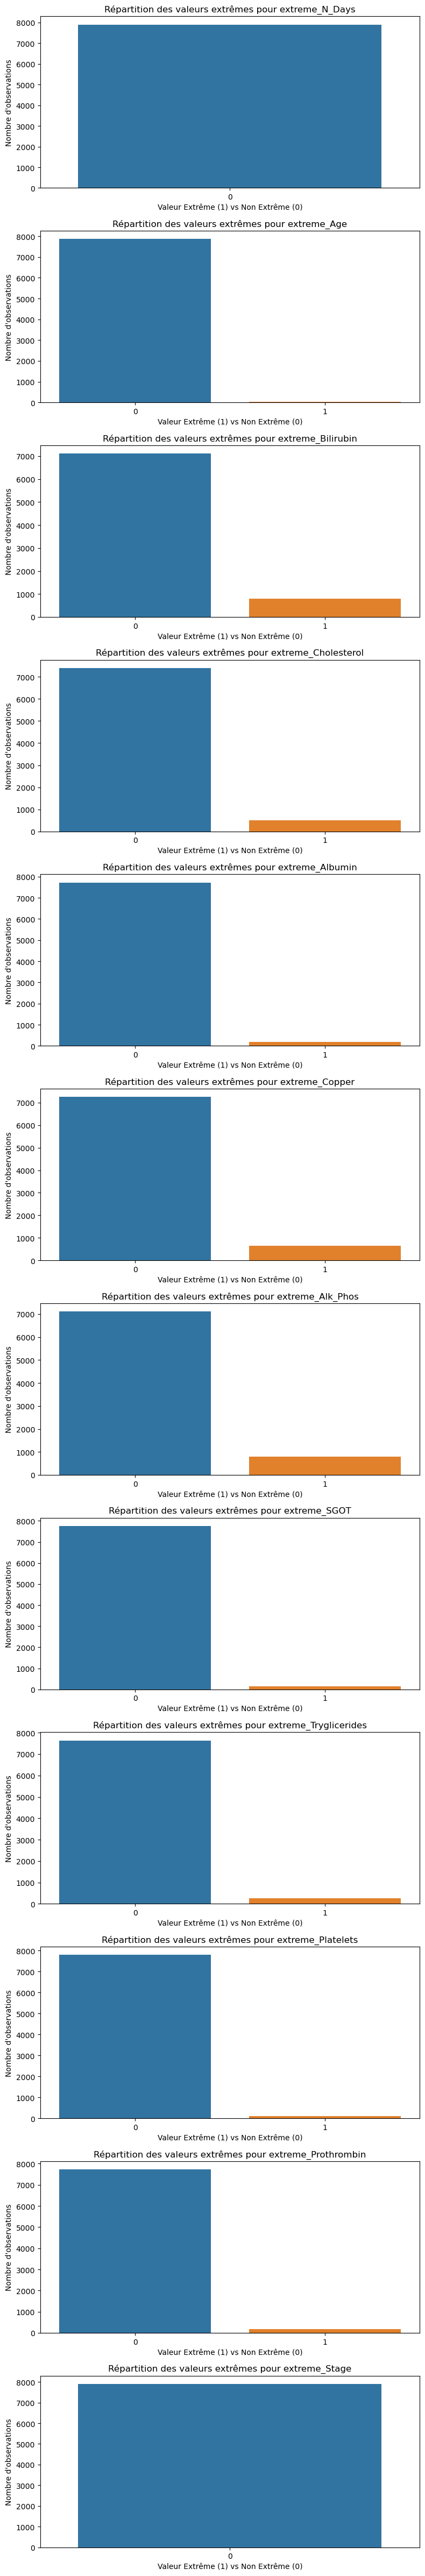

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre de features à visualiser
n_features = sum("extreme_" in i for i in df.columns)

# Création d'une grille de subplots
fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))

# Vérification si axes est un tableau (cas où n_features > 1)
if n_features > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Index pour parcourir les subplots
subplot_idx = 0

for i in df.columns:
    if "extreme_" in i:
        counts = df[i].value_counts()

        # Création du bar plot dans le subplot correspondant
        sns.barplot(x=counts.index, y=counts.values, ax=axes[subplot_idx])
        axes[subplot_idx].set_title(f"Répartition des valeurs extrêmes pour {i}")
        axes[subplot_idx].set_ylabel("Nombre d'observations")
        axes[subplot_idx].set_xlabel("Valeur Extrême (1) vs Non Extrême (0)")

        # Incrémentation de l'index pour le prochain subplot
        subplot_idx += 1

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


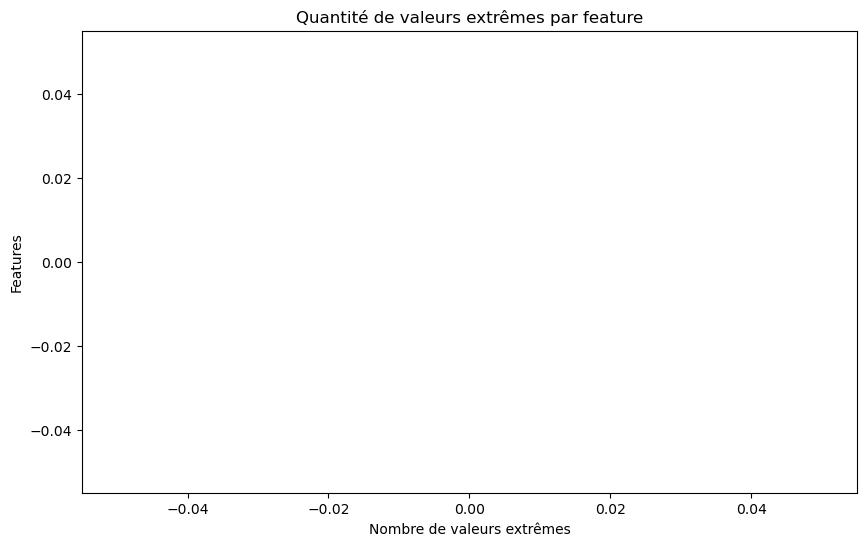

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialisation d'un DataFrame pour stocker les comptes
extreme_counts = pd.DataFrame()

for i in df.columns:
    if "extreme_" in i:
        # Compte le nombre de valeurs extrêmes (1) pour chaque feature
        extreme_count = df[i].sum()
        extreme_counts['Feature'] = i 
        extreme_counts['ExtremeCount']= extreme_count

# Tri des données pour une meilleure lisibilité
extreme_counts = extreme_counts.sort_values(by='ExtremeCount', ascending=True)

# Création du graphique en barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(extreme_counts['Feature'], extreme_counts['ExtremeCount'])

# Personnalisation du graphique
plt.title("Quantité de valeurs extrêmes par feature")
plt.xlabel("Nombre de valeurs extrêmes")
plt.ylabel("Features")
plt.show()


In [29]:
df["extreme_Cholesterol"].value_counts()

extreme_Cholesterol
0    7403
1     502
Name: count, dtype: int64